In [4]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import pandas as pd
import numpy as np
a=pd.read_csv("/content/laptop_data_cleaned.csv")
print(a)


     Company            TypeName  Ram  Weight      Price  TouchScreen  Ips  \
0      Apple           Ultrabook    8    1.37  11.175755            0    1   
1      Apple           Ultrabook    8    1.34  10.776777            0    0   
2         HP            Notebook    8    1.86  10.329931            0    0   
3      Apple           Ultrabook   16    1.83  11.814476            0    1   
4      Apple           Ultrabook    8    1.37  11.473101            0    1   
...      ...                 ...  ...     ...        ...          ...  ...   
1268    Asus            Notebook    4    2.20  10.555257            0    0   
1269  Lenovo  2 in 1 Convertible    4    1.80  10.433899            1    1   
1270  Lenovo  2 in 1 Convertible   16    1.30  11.288115            1    1   
1271  Lenovo            Notebook    2    1.50   9.409283            0    0   
1272      HP            Notebook    6    2.19  10.614129            0    0   

             Ppi              Cpu_brand   HDD  SSD Gpu_brand   

In [5]:
y=a['Price']
x=a.drop(['TypeName','Cpu_brand','Gpu_brand','Os','Company'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
print(x_train.shape,y_train.shape)
lr_model = LinearRegression()
mm=lr_model.fit(x_train, y_train)
lr_predictions = lr_model.predict(x_test)
mse = mean_squared_error(y_test, lr_predictions)
r2 = r2_score(y_test, lr_predictions)
print(f"Linear Regression Mean Squared Error: {mse:.2f}")
print(f"Linear Regression R-squared: {r2:.2f}")
mae = mean_absolute_error(y_test, lr_predictions)
print(f"Linear Regression Mean Absolute Error: {mae:.2f}")

(1018, 8) (1018,)
Linear Regression Mean Squared Error: 0.00
Linear Regression R-squared: 1.00
Linear Regression Mean Absolute Error: 0.00


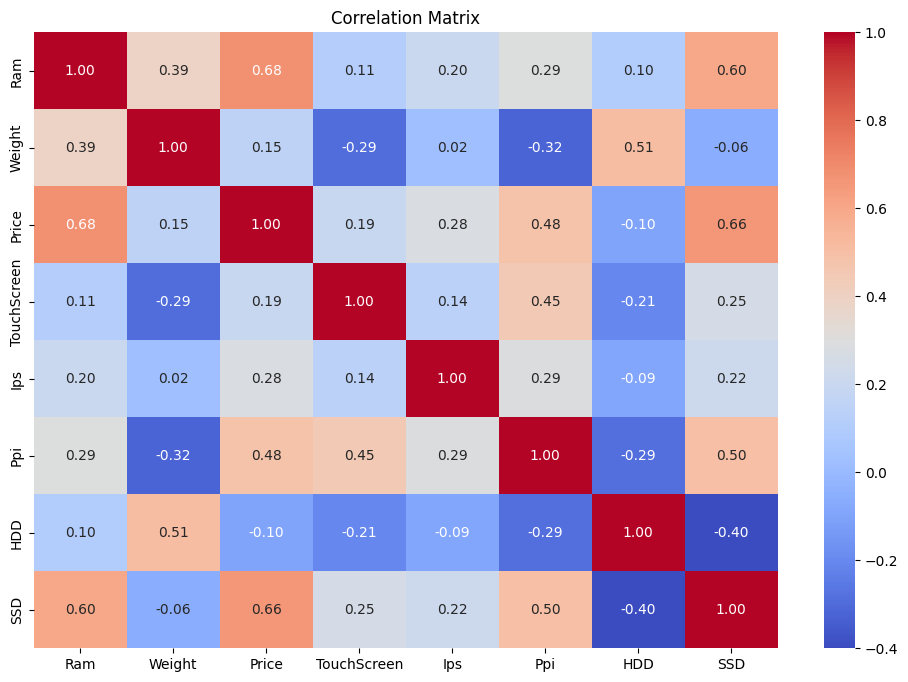

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = x.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

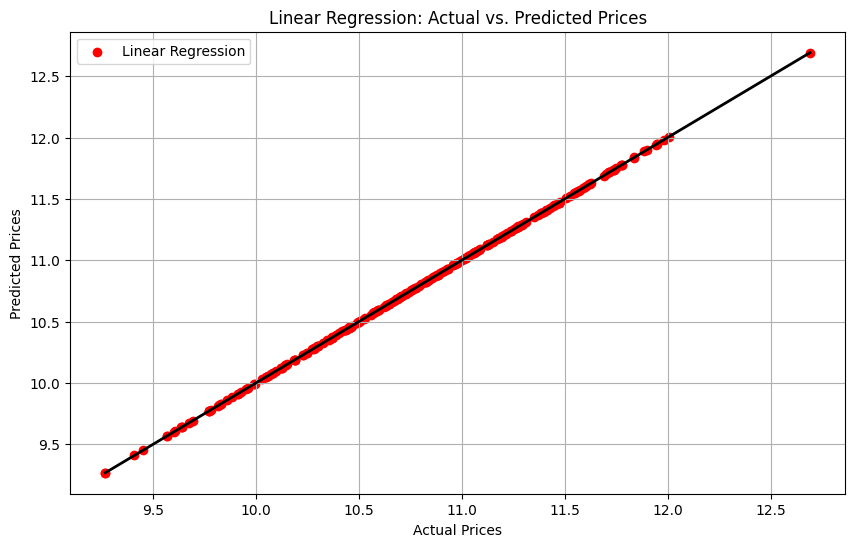

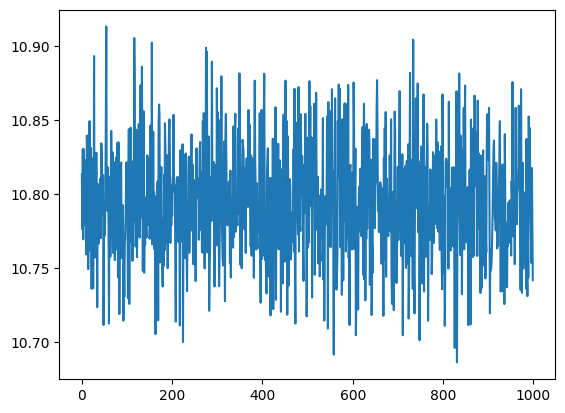

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_predictions, color='red', label='Linear Regression')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs. Predicted Prices')
plt.legend(loc='best')
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='black', linewidth=2)
plt.show()
n_iterations = 1000
n_size = len(x_test)
bootstrap_predictions = []
for _ in range(n_iterations):
    indices = np.random.choice(n_size, size=n_size, replace=True)
    sample_pred =lr_predictions[indices]
    bootstrap_predictions.append(np.mean(sample_pred))
bootstrap_predictions = np.array(bootstrap_predictions)
standard_error = np.std(bootstrap_predictions)
c=range(n_iterations )

n_iterations = 1000
n_size = len(x_test)
bootstrap_predictions = []
for _ in range(n_iterations):
    indices = np.random.choice(n_size, size=n_size, replace=True)
    sample_pred =lr_predictions[indices]
    bootstrap_predictions.append(np.mean(sample_pred))
bootstrap_predictions = np.array(bootstrap_predictions)
standard_error = np.std(bootstrap_predictions)
c=range(n_iterations )
plt.plot(c,bootstrap_predictions)

SVM Regression Mean Squared Error:  0.13634212372325694
SVM Regression Mean Absolute Error:  0.29133428021746444


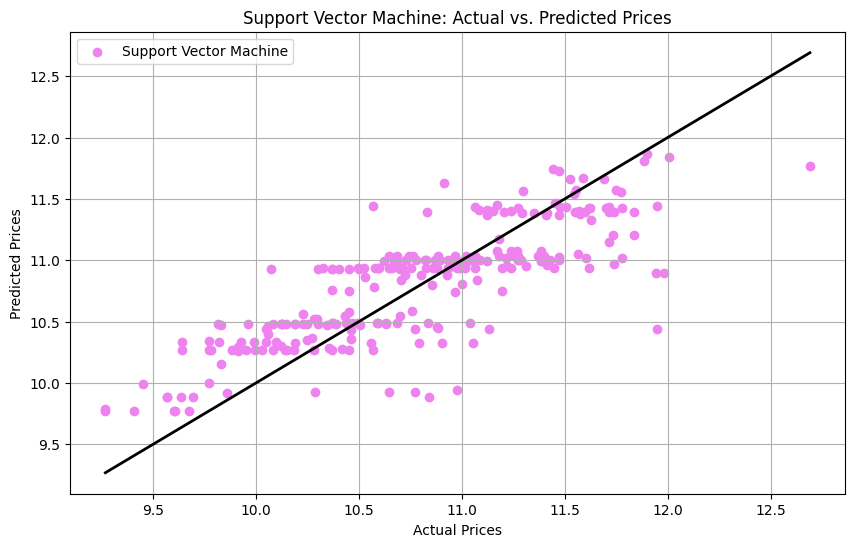

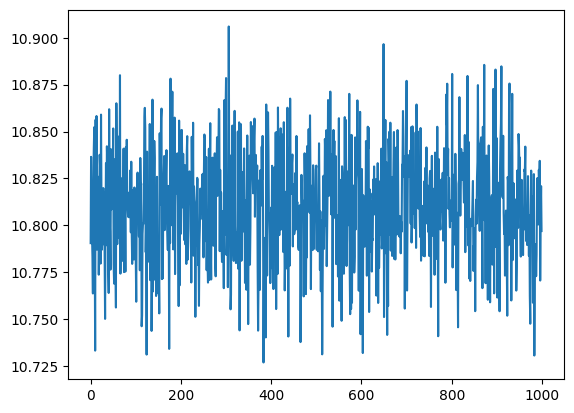

In [8]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

svm_model = SVR()
svm_model.fit(x_train, y_train)
svm_predictions = svm_model.predict(x_test)
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_mae = mean_absolute_error(y_test, svm_predictions)
svm_rmse = (svm_mae**2)**0.5

print("SVM Regression Mean Squared Error: ", svm_mse)
print("SVM Regression Mean Absolute Error: ", svm_mae)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, svm_predictions, color='violet', label='Support Vector Machine')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Support Vector Machine: Actual vs. Predicted Prices')
plt.legend(loc='best')
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='black', linewidth=2)
plt.show()
n_iterations = 1000
n_size = len(x_test)
bootstrap_predictions = []
for _ in range(n_iterations):
    indices = np.random.choice(n_size, size=n_size, replace=True)
    sample_pred =svm_predictions[indices]
    bootstrap_predictions.append(np.mean(sample_pred))
bootstrap_predictions = np.array(bootstrap_predictions)
standard_error = np.std(bootstrap_predictions)
c=range(n_iterations )
plt.plot(c,bootstrap_predictions)


Ridge Regression Mean Squared Error:  5.6418439037900366e-06
Ridge Regression Mean Absolute Error:  0.0019489709693570824
Ridge Regression R-squared:  0.9999857573663812


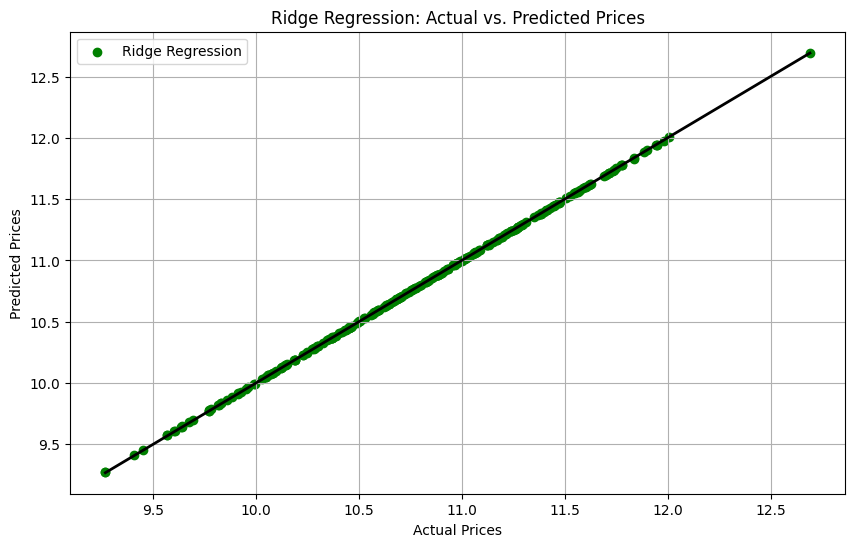

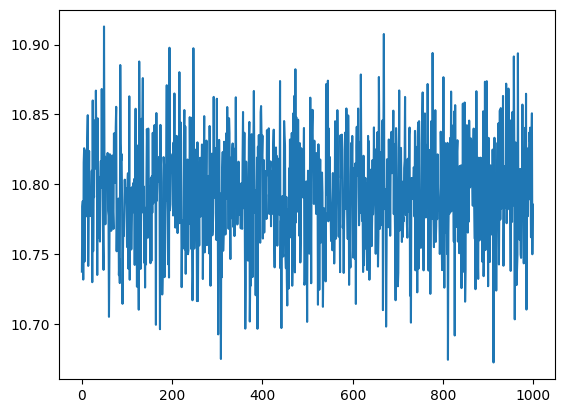

In [9]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)
ridge_predictions = ridge_model.predict(x_test)

ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

print("Ridge Regression Mean Squared Error: ", ridge_mse)
print("Ridge Regression Mean Absolute Error: ", ridge_mae)
print("Ridge Regression R-squared: ", ridge_r2)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_predictions, color='green', label='Ridge Regression')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Ridge Regression: Actual vs. Predicted Prices')
plt.legend(loc='best')
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='black', linewidth=2)
plt.show()
n_iterations = 1000
n_size = len(x_test)
bootstrap_predictions = []
for _ in range(n_iterations):
    indices = np.random.choice(n_size, size=n_size, replace=True)
    sample_pred =ridge_predictions[indices]
    bootstrap_predictions.append(np.mean(sample_pred))
bootstrap_predictions = np.array(bootstrap_predictions)
standard_error = np.std(bootstrap_predictions)
c=range(n_iterations )
plt.plot(c,bootstrap_predictions)

Lasso Regression Mean Squared Error:  0.18277054866381456
Lasso Regression R-squared: 0.54
Lasso Regression Mean Absolute Error:  0.34768265356984174


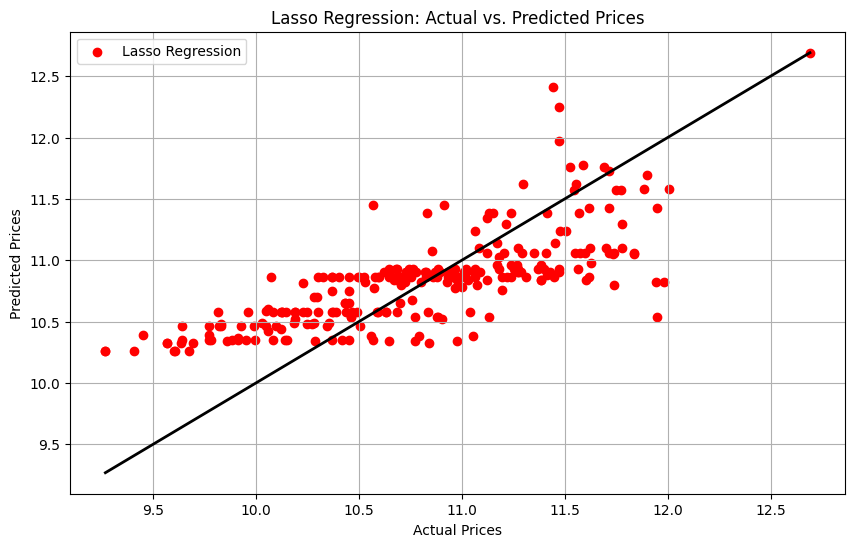

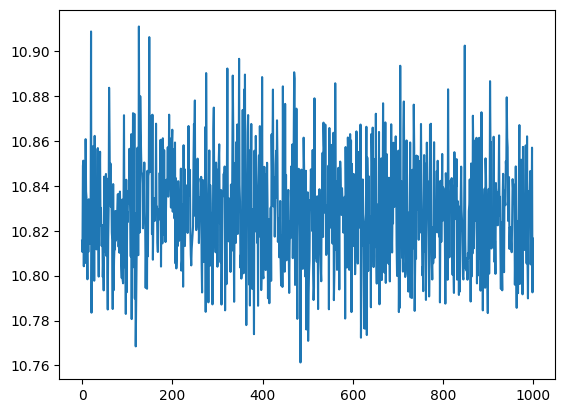

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(x_train, y_train)
lasso_predictions = lasso_model.predict(x_test)

lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
print("Lasso Regression Mean Squared Error: ", lasso_mse)
print(f"Lasso Regression R-squared: {lasso_r2:.2f}")
print("Lasso Regression Mean Absolute Error: ", lasso_mae)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_predictions, color='red', label='Lasso Regression')
plt.xlabel('Actual Prices')
plt.ylabel ('Predicted Prices')
plt.title('Lasso Regression: Actual vs. Predicted Prices')
plt.legend(loc='best')
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='black', linewidth=2)
plt.show()

n_iterations = 1000
n_size = len(x_test)
bootstrap_predictions = []
for _ in range(n_iterations):
    indices = np.random.choice(n_size, size=n_size, replace=True)
    sample_pred =lasso_predictions[indices]
    bootstrap_predictions.append(np.mean(sample_pred))
bootstrap_predictions = np.array(bootstrap_predictions)
standard_error = np.std(bootstrap_predictions)
c=range(n_iterations )
plt.plot(c,bootstrap_predictions)

KNN Regression Mean Squared Error:  0.052775727039304325
KNN Regression R-squared: 0.87
KNN Regression Mean Absolute Error:  0.15537564389889363


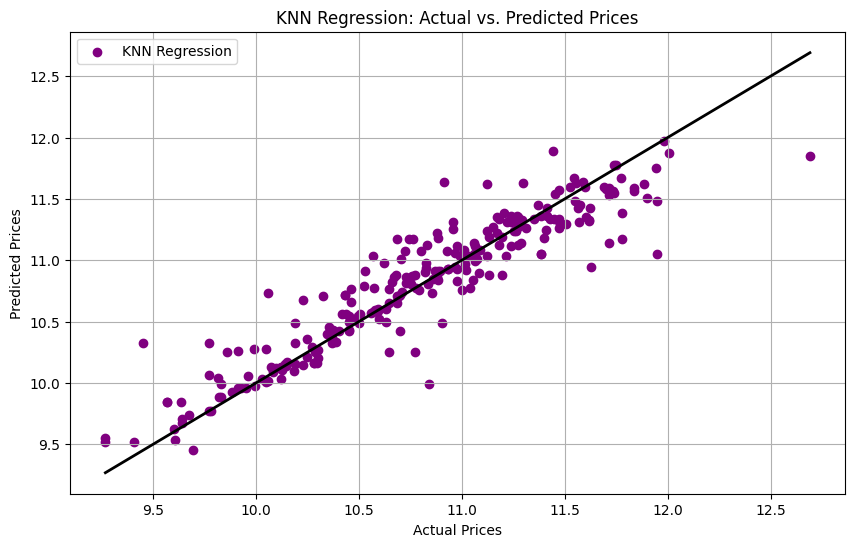

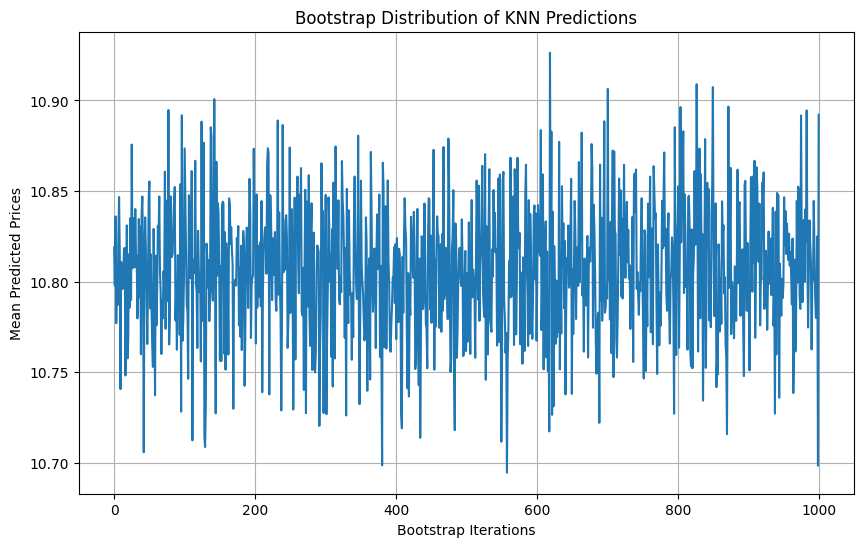

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
knn_model = KNeighborsRegressor()
knn_model.fit(x_train, y_train)
knn_predictions = knn_model.predict(x_test)

knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)
knn_mae = mean_absolute_error(y_test, knn_predictions)

print("KNN Regression Mean Squared Error: ", knn_mse)
print(f"KNN Regression R-squared: {knn_r2:.2f}")
print("KNN Regression Mean Absolute Error: ", knn_mae)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, knn_predictions, color='purple', label='KNN Regression')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('KNN Regression: Actual vs. Predicted Prices')
plt.legend(loc='best')
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='black', linewidth=2)
plt.show()

n_iterations = 1000
n_size = len(x_test)
bootstrap_predictions = []
for _ in range(n_iterations):
    indices = np.random.choice(n_size, size=n_size, replace=True)
    sample_pred = knn_predictions[indices]
    bootstrap_predictions.append(np.mean(sample_pred))

bootstrap_predictions = np.array(bootstrap_predictions)
standard_error = np.std(bootstrap_predictions)

c = range(n_iterations)
plt.figure(figsize=(10, 6))
plt.plot(c, bootstrap_predictions)
plt.xlabel('Bootstrap Iterations')
plt.ylabel('Mean Predicted Prices')
plt.title('Bootstrap Distribution of KNN Predictions')
plt.grid(True)
plt.show()
